# Hypergraph information

In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from tqdm import tqdm

sys.path.append("../src/")

import xgi
from reducibility_hg import *

sb.set_theme(style="ticks", context="paper")


In [2]:
results_dir = "../results/"
out_dir  = f"{results_dir}datasets/"

In [3]:
import os

In [20]:
data = dict()

for file_name in os.listdir(out_dir):
    
    if ".npz" not in file_name:
        continue
        
    data_i = np.load(f"{out_dir}{file_name}")
    
    dataset = file_name.split(".")[0].split("_")[-1]
    data[dataset] = data_i["Q"]
    print(dataset)

ndc-substances
hospital-lyon
email-enron
email-eu
contact-primary-school
tags-ask-ubuntu
contact-high-school


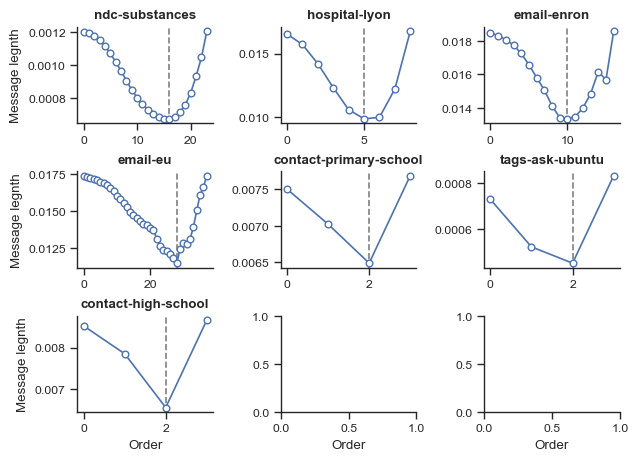

In [47]:
n_sets = len(data)

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(7, 5))

for i, (dataset, Q) in enumerate(data.items()):

    ax = axs.flatten()[i]

    ax.plot(Q, "o-", mfc="white")

    i_min = np.argmin(Q)
    ax.axvline(i_min, c="grey", ls="--", zorder=-2)

    ax.set_title(dataset, weight="bold")

plt.subplots_adjust(wspace=0.5, hspace=0.5)

for ax in axs[:, 0]:
    ax.set_ylabel("Message legnth")

for ax in axs[-1, :]:
    ax.set_xlabel("Order")
    
sb.despine()

fig_name = f"figure_1_v1" #lambda2_HG_SC_N_{N}_ps_{ps}_nrep_{n_repetitions}"

#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")
#plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")